# Part II - (Healthcare Analytics)
## by (Flora Oladipupo)



## Investigation Overview

The aim of this analysis is to determine the factors behind the Length of stay of patients in hospital 

## Dataset Overview

The Dataset can  be downloaded from Kaggle: https://www.kaggle.com/datasets/anmolkumar/janatahack-healthcare-analytics-part-2?select=train.csv

| Column | Description |
| --- | --- |
| case_id | Case_ID registered in Hospital |
| Hospital_code| Unique code for the Hospital |
| Hospital_type_code|Unique code for the type of Hospital |
| City_Code_Hospital|Code of the Hospital |
| Hospital_region_code|Region Code of the Hospital |
| Available Extra Rooms in Hospital|Number of Extra rooms available in the Hospital |
| Department|Department overlooking the case|
|Ward_Type|Code for the Ward type|
| Ward_Facility_Code|Code for the Ward Facility|
| Bed Grade|Condition of Bed in the Ward|
| patientid|Unique Patient Id|
| City_Code_Patient|City Code for the patient|
| Type of Admission|Admission Type registered by the Hospital|
| Severity of Illness|Severity of the illness recorded at the time of admission|
| Visitors with Patient|Number of Visitors with the patient|
| Age|Age of the patient|
| Admission_Deposit|Deposit at the Admission Time|
| Stay|Stay Days by the patient|


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Health.csv')

In [3]:
#renaming column
df = df.rename(columns={'Available Extra Rooms in Hospital':'Extra_Rooms', 'Type of Admission':'Type_of_Admission', 'Severity of Illness':'Severity_of_Illness','Bed Grade':'Bed_Grade','Visitors with Patient':'Visitors_with_Patient'})

In [4]:
df.isnull().sum()

case_id                     0
Hospital_code               0
Hospital_type_code          0
City_Code_Hospital          0
Hospital_region_code        0
Extra_Rooms                 0
Department                  0
Ward_Type                   0
Ward_Facility_Code          0
Bed_Grade                 113
patientid                   0
City_Code_Patient        4532
Type_of_Admission           0
Severity_of_Illness         0
Visitors_with_Patient       0
Age                         0
Admission_Deposit           0
Stay                        0
dtype: int64

In [5]:
df = df.dropna(axis = 1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [6]:
# convert categorical data into ordered categorical data
ordinal_data = {'Hospital_type_code': ['g','f','e','d','c','b','a'],
                    'Hospital_region_code': ['Z', 'Y', 'X'],
                    'Ward_Type': ['U', 'T', 'S', 'R', 'Q', 'P'],
                   'Ward_Facility_Code':['F','E','D','C','B','A'],
                   'Severity_of_Illness':['Extreme','Moderate','Minor'],
                   'Type_of_Admission':['Emergency','Urgent','Trauma'],
                   'Age':['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                   'Stay':['More than 100 Days','91-100','81-90','71-80','61-70','51-60','41-50','31-40','21-30',
                           '11-20','0-10']}

for ordi in ordinal_data:
    cat = pd.CategoricalDtype(ordered = True,categories = ordinal_data[ordi])
    df[ordi] = df[ordi].astype(cat)

In [7]:
#a function is created to avoid repeating code for plots
def chart(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## (Visualization 1)

### Pattern associated with Length of stay
This answer the question of what the most usual length of stay at the hospital is

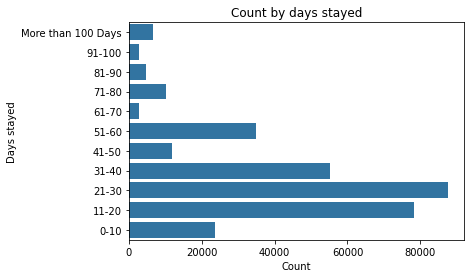

In [8]:
#to count number of days stayed in the hospital
base_color=sns.color_palette()[0]
sns.countplot(data=df, y='Stay', color=base_color)
chart('Count','Days stayed','Count by days stayed')

## (Visualization 2)

### Does severity of illness has to do with length of stay?

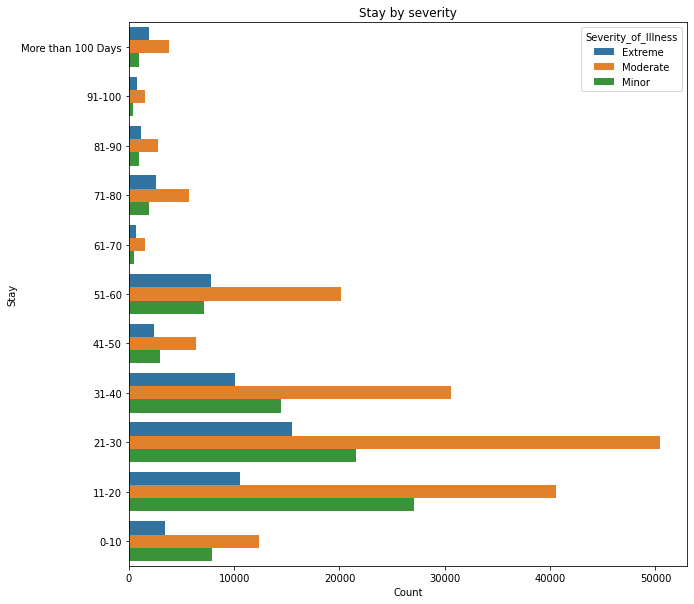

In [9]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, y = 'Stay', hue = 'Severity_of_Illness')
chart('Count', 'Stay', 'Stay by severity')

## (Visualization 3)

### Age with most severity of illness

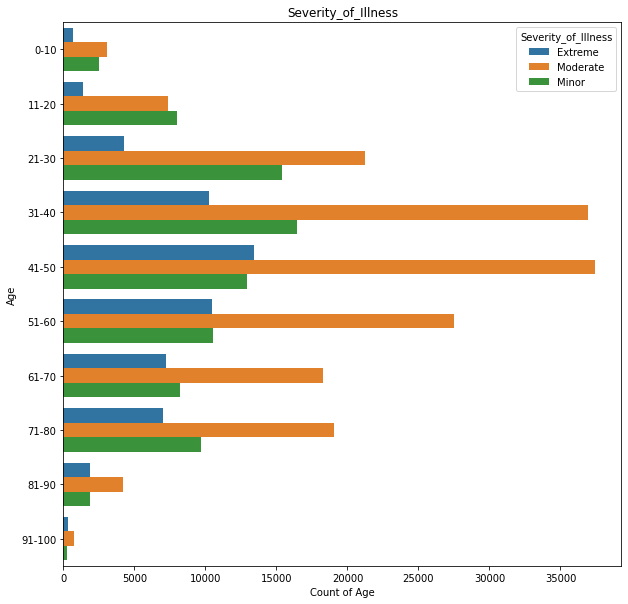

In [10]:
plt.figure(figsize = [10,10])
sns.countplot(data = df, y = 'Age', hue = 'Severity_of_Illness')
chart('Count of Age', 'Age', 'Severity_of_Illness')